<a href="https://colab.research.google.com/github/luchiip/LuisanaPadillaCoderHouse_DataScientist_I/blob/main/LuisanaPadilla_PF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lectura de Datos**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
archivo_de_paltas = '/content/drive/My Drive/LuisanaPadilla_CODERHOUSE_DataScientist/avocado.csv'
archivo_de_propiedades = '/content/drive/My Drive/LuisanaPadilla_CODERHOUSE_DataScientist/bsas_realstate_on_sale_properati_dataset_2020.csv'
archivo_de_propiedades_gral = '/content/drive/My Drive/LuisanaPadilla_CODERHOUSE_DataScientist/kc_house_data.csv'

In [4]:
df_paltas = pd.read_csv(archivo_de_paltas)
df_propiedades = pd.read_csv(archivo_de_propiedades)
df_propiedades_gral = pd.read_csv(archivo_de_propiedades_gral)
print(df_propiedades.head())

   start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1         

In [5]:
df_propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [6]:
df_propiedades['rooms'] = df_propiedades['rooms'].astype(int)
df_propiedades['bedrooms'] = df_propiedades['bedrooms'].astype(int)
print(df_propiedades.head())

   start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal      7         7        2.0   
1         Capital Federal          Boedo      2         1        2.0   
2         Capital Federal        Palermo      2         1        1.0   
3         Capital Federal        Palermo      2         1        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata      2         1        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1         

**Data Wrangling: Limpieza y transformación de datos**

In [7]:
avg_surface_by_rooms = df_propiedades.groupby('rooms')['surface_total'].mean()
def llenar_surface_total(row):
    if pd.isnull(row['surface_total']):
        return avg_surface_by_rooms[row['rooms']]
    else:
        return row['surface_total']


df_propiedades['surface_total'] = df_propiedades.apply(llenar_surface_total, axis=1)

avg_surfaceC_by_rooms = df_propiedades.groupby('rooms')['surface_covered'].mean()
def llenar_surface_covered(row):
    if pd.isnull(row['surface_covered']):
        return avg_surfaceC_by_rooms[row['rooms']]
    else:
        return row['surface_covered']
df_propiedades['surface_covered'] = df_propiedades.apply(llenar_surface_covered, axis=1)

avg_bathrooms_by_rooms = df_propiedades.groupby('rooms')['bathrooms'].mean()
def llenar_bathroom(row):
    if pd.isnull(row['bathrooms']):
        return avg_bathrooms_by_rooms[row['rooms']]
    else:
        return row['bathrooms']
df_propiedades['bathrooms'] = df_propiedades.apply(llenar_bathroom, axis=1)

df_propiedades.drop(columns=['lat', 'lon'], inplace=True)

df_propiedades = df_propiedades.dropna(subset=['surface_total', 'surface_covered'])

print(df_propiedades.info())

<class 'pandas.core.frame.DataFrame'>
Index: 146658 entries, 0 to 146659
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146658 non-null  object 
 1   end_date         146658 non-null  object 
 2   created_on       146658 non-null  object 
 3   l1               146658 non-null  object 
 4   l2               146658 non-null  object 
 5   l3               146658 non-null  object 
 6   rooms            146658 non-null  int64  
 7   bedrooms         146658 non-null  int64  
 8   bathrooms        146658 non-null  float64
 9   surface_total    146658 non-null  float64
 10  surface_covered  146658 non-null  float64
 11  price            146658 non-null  float64
 12  currency         146658 non-null  object 
 13  title            146658 non-null  object 
 14  description      146658 non-null  object 
 15  property_type    146658 non-null  object 
 16  operation_type   146658 non-null  object 
d

In [8]:
df_propiedades.head()

,start_date,end_date,created_on,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,Argentina,Capital Federal,San Cristobal,7,7,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,Argentina,Capital Federal,Boedo,2,1,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,Argentina,Capital Federal,Palermo,2,1,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,Argentina,Capital Federal,Palermo,2,1,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2,1,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [9]:
df_propiedades.tail()

,start_date,end_date,created_on,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
146655,2019-07-31,2019-08-13,2019-07-31,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2,1,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4,3,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1,1,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2,1,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta
146659,2019-07-31,2019-10-12,2019-07-31,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3,2,1.0,75.0,75.0,98000.0,USD,Departamento en venta en Manzanares Chico,"Departamento en el Barrio Manzanares Chico , e...",Departamento,Venta


In [10]:
df_paltas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [11]:
df_paltas.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
df_paltas.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [13]:
df_propiedades_gral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
df_propiedades_gral.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
df_propiedades_gral.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [16]:
property_counts = df_propiedades['property_type'].value_counts()
print(property_counts)

property_type
Departamento       107326
Casa                21519
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: count, dtype: int64


**EDA: Análisis Exploratorio de datos**

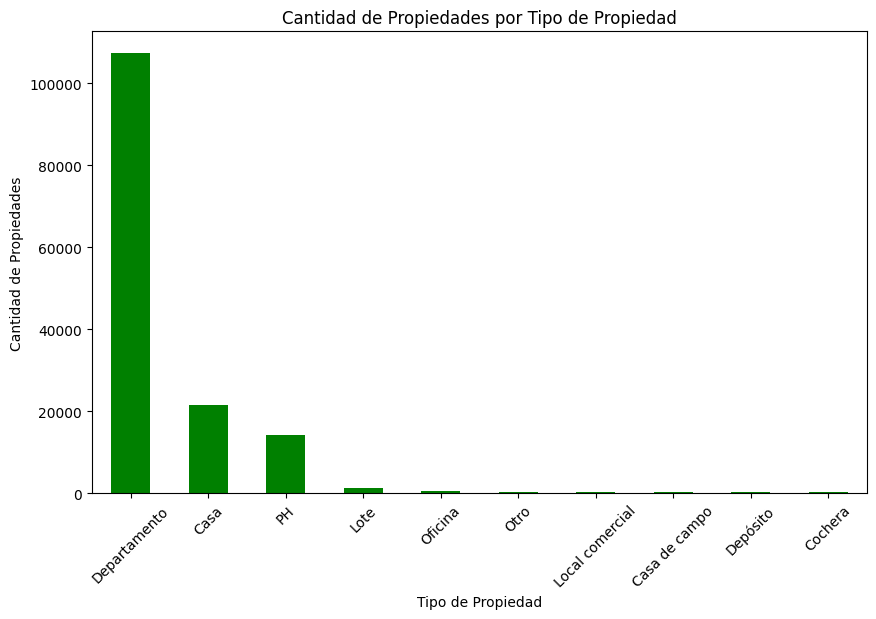

In [17]:
plt.figure(figsize=(10, 6))
property_counts.plot(kind='bar', color='green')
plt.title('Cantidad de Propiedades por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad de Propiedades')
plt.xticks(rotation=45)
plt.show()

<ipython-input-18-e78748386034>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(grouped_data.index.to_period('M').strftime('%Y-%m')))


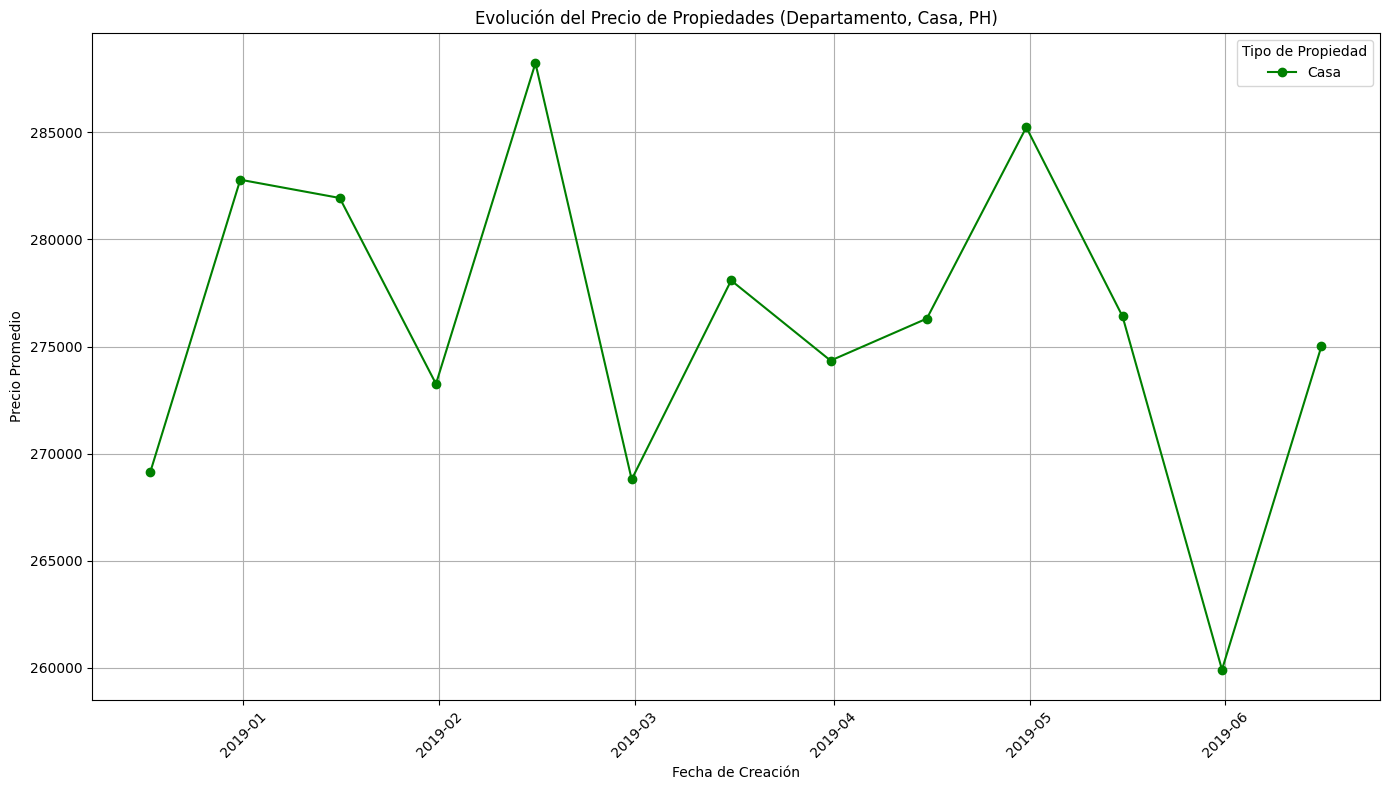

<ipython-input-18-e78748386034>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(grouped_data.index.to_period('M').strftime('%Y-%m')))


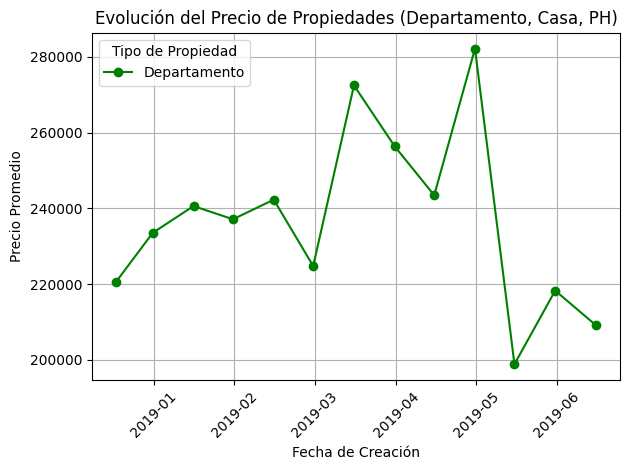

<ipython-input-18-e78748386034>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(grouped_data.index.to_period('M').strftime('%Y-%m')))


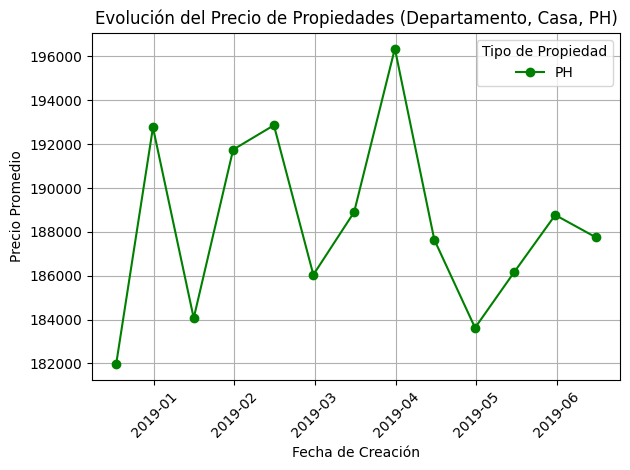

In [18]:
df_propiedades['created_on'] = pd.to_datetime(df_propiedades['created_on'])
filtered_df = df_propiedades[df_propiedades['property_type'].isin(['Departamento', 'Casa', 'PH'])]
grouped_data = filtered_df.groupby(['property_type', pd.Grouper(key='created_on', freq='M')])['price'].mean().unstack(level=0)
plt.figure(figsize=(14, 8))
for property_type in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[property_type], marker='o', label=property_type, color='green')
    plt.title('Evolución del Precio de Propiedades (Departamento, Casa, PH)')
    plt.xlabel('Fecha de Creación')
    plt.ylabel('Precio Promedio')
    plt.legend(title='Tipo de Propiedad')
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(grouped_data.index.to_period('M').strftime('%Y-%m')))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<ipython-input-19-83144a30f60b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(grouped_data.index.to_period('M').strftime('%Y-%m')))


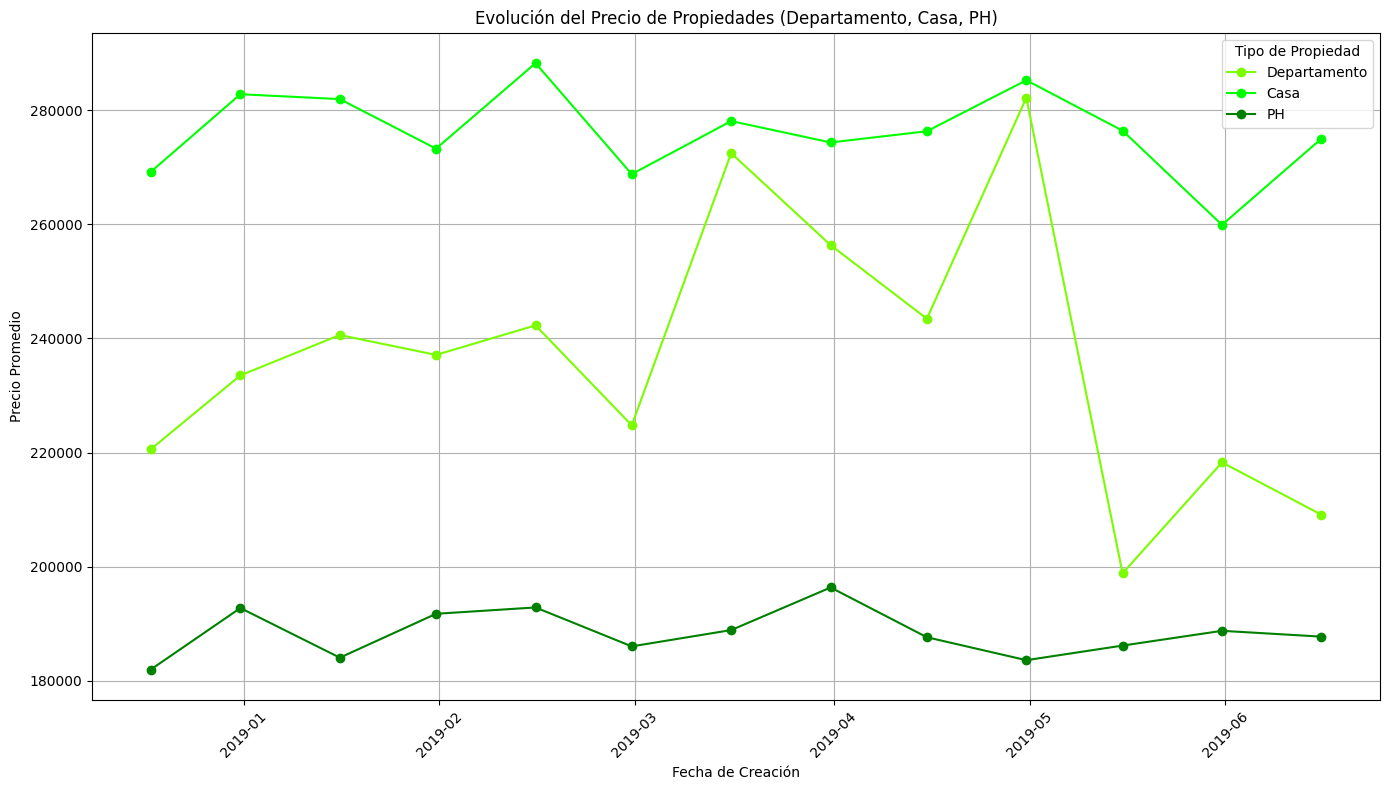

In [19]:
# prompt: podemos superponer los 3 graficos anteriores en uno solo donde cada línea de tipo de propiedad tiene un color distinto? (preferiblemente tonalidades de verde)

colors = {'Departamento': '#7CFC00', 'Casa': '#00FF00', 'PH': '#008000'}

plt.figure(figsize=(14, 8))
for property_type, color in colors.items():
    plt.plot(grouped_data.index, grouped_data[property_type], marker='o', color=color, label=property_type)

plt.title('Evolución del Precio de Propiedades (Departamento, Casa, PH)')
plt.xlabel('Fecha de Creación')
plt.ylabel('Precio Promedio')
plt.legend(title='Tipo de Propiedad')
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(grouped_data.index.to_period('M').strftime('%Y-%m')))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


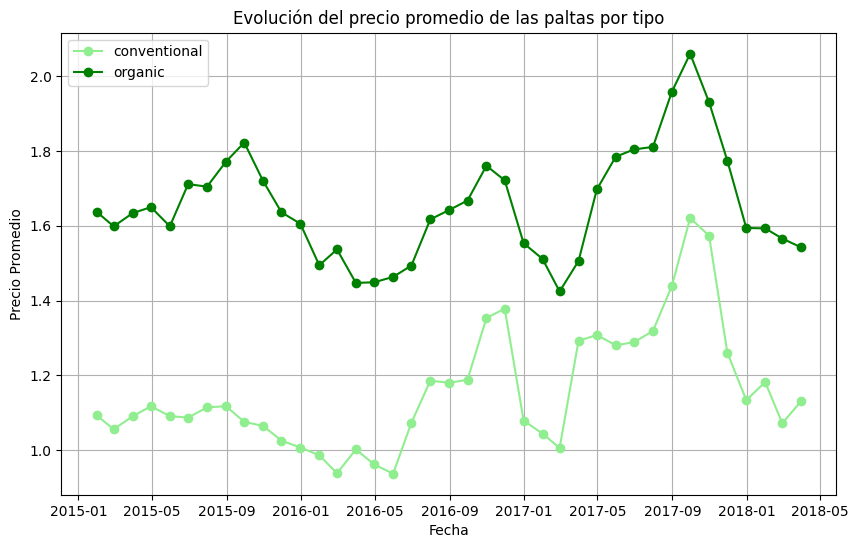

In [20]:
df_paltas['Date'] = pd.to_datetime(df_paltas['Date'])
df_promedio = df_paltas.groupby(['type', pd.Grouper(key='Date', freq='M')])['AveragePrice'].mean().reset_index()
plt.figure(figsize=(10, 6))
colores = ['lightgreen', 'green']
for i, (tipo, datos) in enumerate(df_promedio.groupby('type')):
    plt.plot(datos['Date'], datos['AveragePrice'], label=tipo, color=colores[i % len(colores)], marker='o')
    plt.xlabel('Fecha')
    plt.ylabel('Precio Promedio')
    plt.title('Evolución del precio promedio de las paltas por tipo')
    plt.grid(True)
    plt.legend()

In [21]:
conteo_paltas_type = df_paltas['type'].value_counts()
print(conteo_paltas_type)

type
conventional    9126
organic         9123
Name: count, dtype: int64


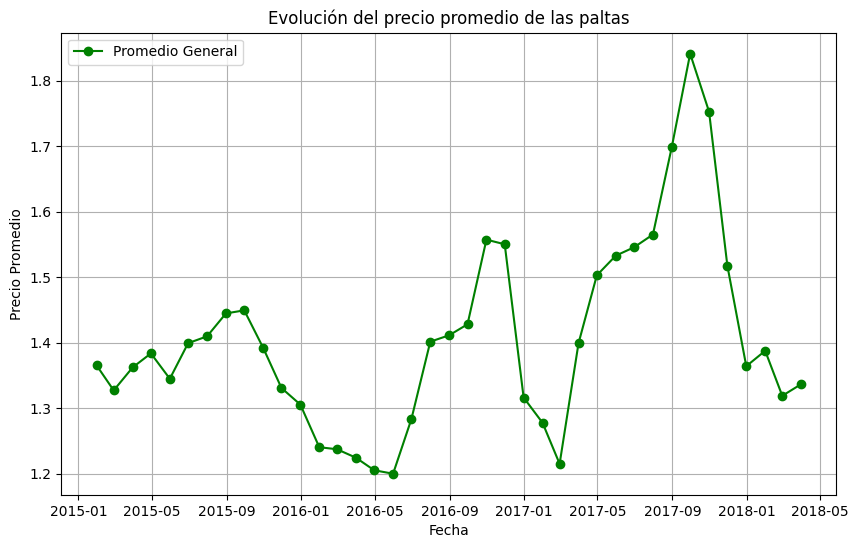

In [22]:
df_paltas['Date'] = pd.to_datetime(df_paltas['Date'])
df_promedio = df_paltas.groupby(pd.Grouper(key='Date', freq='M'))['AveragePrice'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_promedio['Date'], df_promedio['AveragePrice'], label='Promedio General', color='green', marker='o')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.title('Evolución del precio promedio de las paltas')
plt.grid(True)
plt.legend()
plt.show()


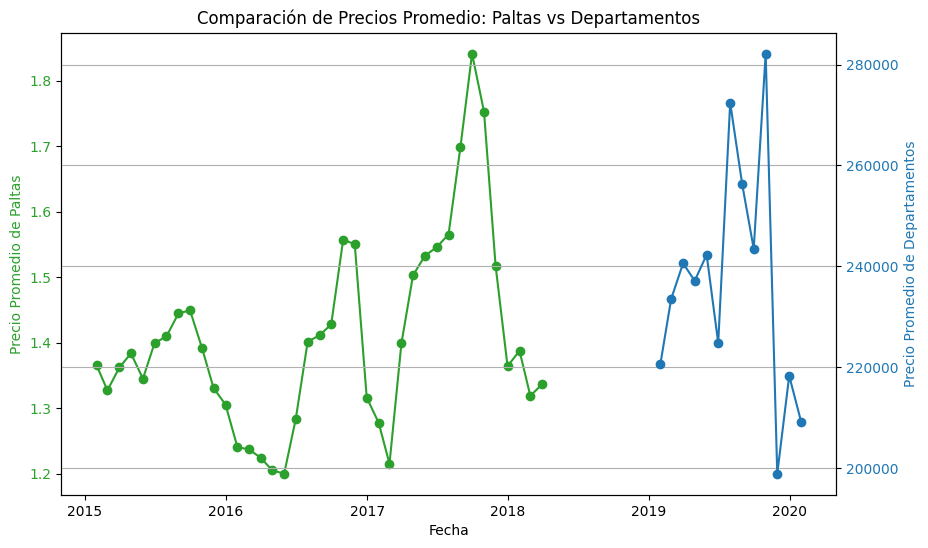

In [23]:
df_paltas['Date'] = pd.to_datetime(df_paltas['Date'])
df_promedio_paltas = df_paltas.groupby(pd.Grouper(key='Date', freq='M'))['AveragePrice'].mean().reset_index()

df_propiedades['created_on'] = pd.to_datetime(df_propiedades['created_on'])
filtered_df = df_propiedades[df_propiedades['property_type'] == 'Departamento']
df_promedio_departamentos = filtered_df.groupby(pd.Grouper(key='created_on', freq='M'))['price'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:green'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio Promedio de Paltas', color=color)
ax1.plot(df_promedio_paltas['Date'], df_promedio_paltas['AveragePrice'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Precio Promedio de Departamentos', color=color)
ax2.plot(df_promedio_departamentos['created_on'], df_promedio_departamentos['price'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Comparación de Precios Promedio: Paltas vs Departamentos')
plt.grid(True)
plt.show()


**Preprocesamiento de Datos**

In [24]:
df_paltas=pd.get_dummies(df_paltas, columns=['type'])
df_paltas

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_conventional,type_organic
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,True,False
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,True,False
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,True,False
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,True,False
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,False,True
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,False,True
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,False,True
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,False,True


In [25]:
df_propiedades=pd.get_dummies(df_propiedades, columns=['property_type', 'l2', 'l3', 'l1', 'currency', 'operation_type'])
df_propiedades

,start_date,end_date,created_on,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,...,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,l1_Argentina,currency_USD,operation_type_Venta
0,2019-10-17,2019-12-23,2019-10-17,7,7,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",...,False,False,False,False,False,False,False,True,True,True
1,2019-10-17,2019-11-21,2019-10-17,2,1,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,...,False,False,False,False,False,False,False,True,True,True
2,2019-10-17,2019-11-01,2019-10-17,2,1,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,...,False,False,False,False,False,False,False,True,True,True
3,2019-10-17,2019-12-23,2019-10-17,2,1,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,...,False,False,False,False,False,False,False,True,True,True
4,2019-10-17,2020-03-11,2019-10-17,2,1,1.0,50.0,35.0,40000.0,58 entre 1 y 2 Venta de departamento en ph.1 ...,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,2,1,1.0,54.0,48.0,165000.0,Departamento en Venta en Barrio Privado Barran...,...,False,False,False,False,False,False,False,True,True,True
146656,2019-07-31,2019-08-14,2019-07-31,4,3,2.0,164.0,90.0,130000.0,Venta departamentos tres dormitorios jardín co...,...,False,False,False,False,False,False,False,True,True,True
146657,2019-07-31,2019-08-14,2019-07-31,1,1,1.0,50.0,35.0,73000.0,Venta departamento de un ambiente Manzanares C...,...,False,False,False,False,False,False,False,True,True,True
146658,2019-07-31,2019-08-14,2019-07-31,2,1,1.0,38.0,38.0,68000.0,Departamento en Venta. Manzanares chico.,...,False,False,False,False,False,False,False,True,True,True


In [27]:
# Al tener problemas con las fechas, he pedido a IA que me ayude a formatear las columnas de fechas de "created on" de la siguiente manera:

# Definir una fecha base
base_date = pd.to_datetime('2000-01-01')

# Calcular el número de días desde la fecha base
df_propiedades['days_from_base_created'] = (df_propiedades['created_on'] - base_date).dt.days

# Eliminar las columnas originales de fechas si no son necesarias
df_propiedades.drop(['start_date', 'end_date', 'created_on'], axis=1, inplace=True)

# Imprimir el DataFrame para verificar
print(df_propiedades.head())


   rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
0      7         7        2.0          140.0            140.0  153000.0   
1      2         1        2.0           70.0             58.0  159000.0   
2      2         1        1.0           45.0             45.0  125000.0   
3      2         1        1.0           85.0             50.0  295000.0   
4      2         1        1.0           50.0             35.0   40000.0   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description  property_type_Casa  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...               False   
1   PH reciclado en Boedo a una cuadra de la plaz...        

**Feature Selection**

In [46]:
X = df_propiedades.drop(['price', 'title', 'description'], axis=1)
y = df_propiedades['price']


**Modelo**

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_test)
print(y_pred)

[109458.05479841 407492.96487046 247240.51150778 ... 278338.91073083
 349694.3056864   88659.3898046 ]


In [53]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2:.2f}')

Error Cuadrático Medio (MSE): 58247713946.90
Coeficiente de Determinación (R^2): 0.39
